In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams

In [2]:
with open('beats.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines = file.readlines()
    lines = lines[2:]
    lines = [float(line.split(",")[2]) for line in lines]

print(lines)


[0.0008, 0.0072, 0.0072, 0.0, 0.0, 0.0072, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0, 0.0064, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0072, 0.0064, 0.0008, 0.0008, 0.0072, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0072, 0.0008, 0.0072, 0.0008, 0.0064, 0.0008, 0.0072, 0.0064, 0.0008, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0008, 0.0064, 0.0008, 0.0008, 0.0072, 0.0, 0.0064, 0.0008, 0.0072, 0.0064, 0.0, 0.0008, 0.0072, 0.0, 0.0072, 0.0072, 0.0, 0.0, 0.0072, 0.0, 0.0072, 0.0064, 0.0008, 0.0072, 0.0, 0.0072, 0.0, 0.0, 0.0072, 0.0064, 0.0, 0.0008, 0.0064, 0.0072, 0.0, 0.0008, 0.0064, 0.0008, 0.0072, 0.0008, 0.0072, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0072, 0.0072, 0.0008, 0.0008, 0.0064, 0.0072, 0.0008, 0.0, 0.008, 0.0072, 0.0, 0.0, 0.0072, 0.0008, 0.0072, 0.0064, 0.0008, 0.0, 0.0064, 0.0008, 0.0064, 0.0, 0.0072, 0.0, 0.0064, 0.0072, 0.0, 0.0072, 0.0, 0.0072, 0.0, 0.0008, 0.0072, 0.0, 0.0072, 0.0, 0.0064, 0.0072, 0.0008, 0.0008, 0.0072, 0.0064, 0.0, 0.0072, 0.0, 0.0072, 0.0008, 0.00

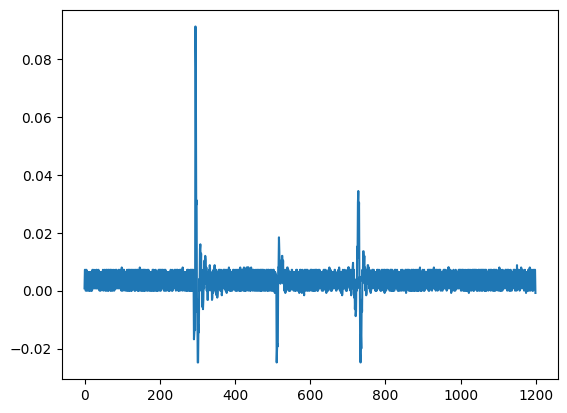

In [8]:
plt.plot(lines)
plt.show()

In [6]:
with open('tauvariation.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines2 = file.readlines()
    lines2 = lines2[2:]
    lines2 = [float(line.split(",")[2]) for line in lines2]

print(lines2)


[0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0072, 0.0, 0.0008, 0.0064, 0.0008, 0.0064, 0.0008, 0.0064, 0.0, 0.0064, 0.0064, 0.0008, 0.0064, 0.0, 0.0008, 0.0064, 0.0064, 0.0, 0.0, 0.0064, 0.0, 0.0064, 0.0064, 0.0, 0.0056, 0.0, 0.0008, 0.0064, 0.0, 0.0056, 0.0, 0.0056, 0.0, 0.0064, 0.0, 0.0056, 0.0064, 0.0008, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0072, 0.0, 0.0064, 0.0064, 0.0008, 0.0008, 0.0064, 0.0072, 0.0, 0.0064, 0.0008, 0.0064, 0.0, 0.0008, 0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0008, 0.0064, 0.0056, 0.0, 0.0056, 0.0, 0.0064, 0.0, 0.0056, -0.0008, 0.0008, 0.0064, 0.0, 0.0056, 0.0, 0.0064, 0.0056, 0.0, 0.0064, 0.0008, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0064, 0.0008, 0.0064, 0.0064, 0.0, 0.0, 0.0056, 0.0064, 0.0, 0.0064, 0.0, 0.0008, 0.0064, 0.0008, 0.0064, 0.0064, 0.0, 0.0008, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0072, 0.0, 0.0, 0.0064, 

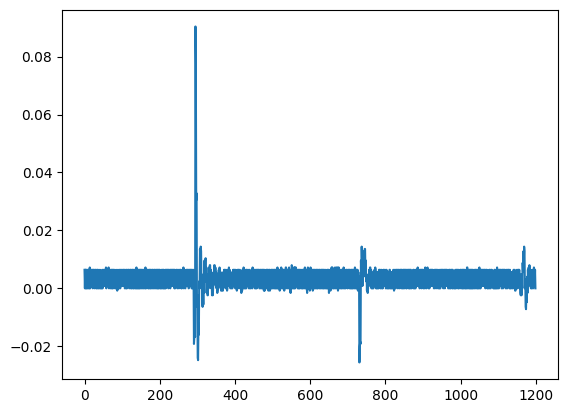

In [7]:
plt.plot(lines2)
plt.show()